# Linear Regression on adult.csv

#### Import Modules

In [17]:
import pandas as pd

#### Loading the dataset

In [18]:
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### Splitting the Data into Training and Test Sets

In [19]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df)
print(f"df_train: {df_train.shape}")
print(f"df_test: {df_test.shape}")

df_train: (24420, 15)
df_test: (8141, 15)


#### Data Exploration

In [20]:
df_train.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
target            object
dtype: object

<Axes: >

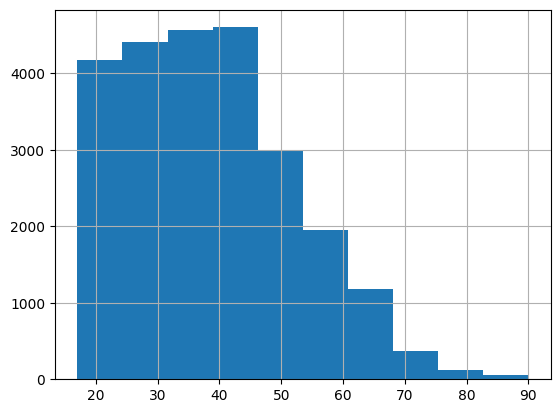

In [21]:
df_train["age"].hist()

<Axes: >

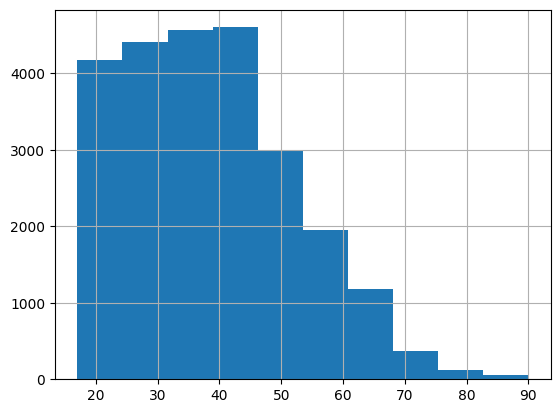

In [22]:
df_train["age"].hist()

<Axes: xlabel='workclass'>

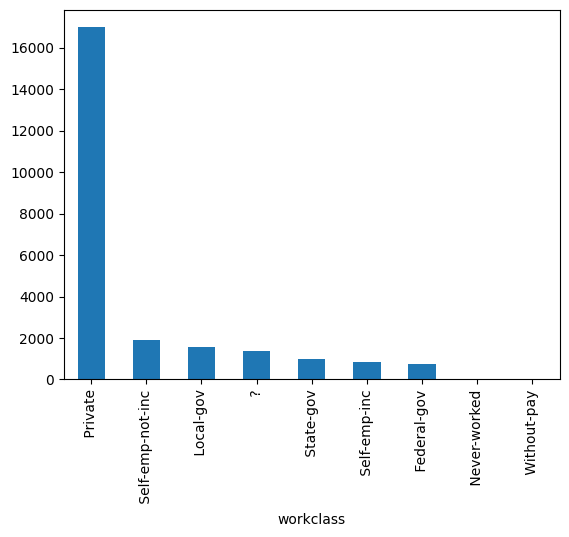

In [23]:
df_train["workclass"].value_counts().plot(kind='bar')

In [24]:
df_train["workclass"].unique()

array([' Federal-gov', ' Private', ' ?', ' Local-gov',
       ' Self-emp-not-inc', ' Self-emp-inc', ' State-gov',
       ' Never-worked', ' Without-pay'], dtype=object)

<Axes: xlabel='target'>

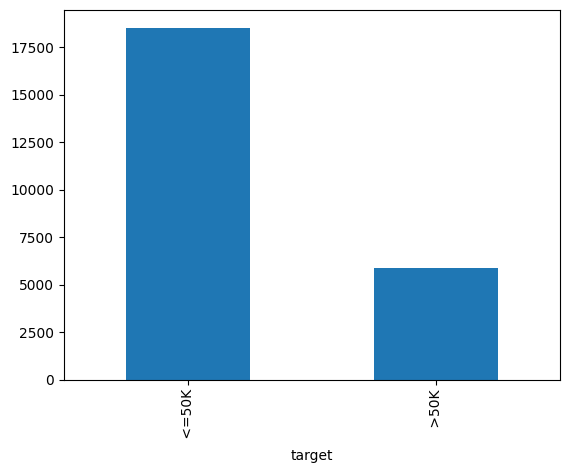

In [25]:
df_train["target"].value_counts().plot(kind='bar')

### Data Preprocessing

#### Removing missing values

In [26]:
df_train = df_train.replace("?", pd.NaT)
df_train = df_train.dropna()
print(f"df_train_cleaned: {df_train.shape}")

df_test = df_test.replace("?", pd.NaT)
df_test = df_test.dropna()
print(f"df_test_cleaned: {df_test.shape}")

df_train_cleaned: (24420, 15)
df_test_cleaned: (8141, 15)


#### Splitting Features and the Target Label
#### Splitting training and testing data - 75 % for training 25 % for testing

In [27]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable for training data
y_train = label_encoder.fit_transform(df_train["target"])
x_train = df_train.drop(["target"], axis=1)
print(f"x_train: {x_train.shape}")
print(f"y_train: {y_train.shape}")

# Transform the target variable for test data
y_test = label_encoder.transform(df_test["target"])
x_test = df_test.drop(["target"], axis=1)
print(f"x_test: {x_test.shape}")
print(f"y_test: {y_test.shape}")

x_train: (24420, 14)
y_train: (24420,)
x_test: (8141, 14)
y_test: (8141,)


### Feature Engineering 

#### One-Hot Encoding and Standadization

In [28]:
# Column Transformation
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numerical_attributes = x_train.select_dtypes(include=['int64', 'float64']).columns
categorical_attributes = x_train.select_dtypes(include=['object']).columns

ct = ColumnTransformer([
    ('standar_scaler', StandardScaler(), numerical_attributes),     # Standardizes numerical columns
    ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore'), categorical_attributes)     # One-Hot Encodes categorical columns
]).fit(x_train)

transformed_x_train = ct.transform(x_train)
transformed_x_test = ct.transform(x_test)

transformed_x_train, transformed_x_test

(<Compressed Sparse Row sparse matrix of dtype 'float64'
 	with 341880 stored elements and shape (24420, 108)>,
 <Compressed Sparse Row sparse matrix of dtype 'float64'
 	with 113974 stored elements and shape (8141, 108)>)

#### Dimensionality Reduction

In [29]:
# PCA: applies Principal Component Analysis (PCA) to reduce the dimensionality 
# of the dataset while retaining as much variance as possible.
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(transformed_x_train)

x_train_pca = pca.transform(transformed_x_train)
x_test_pca = pca.transform(transformed_x_test)

print(pca.explained_variance_ratio_)  # Shows the percentage of variance retained per component
print(sum(pca.explained_variance_ratio_))  # Shows the total variance retained


[0.14850631 0.10720612]
0.2557124358659243


In [32]:
x_train_pca, x_test_pca

(array([[ 0.1925031 , -0.66211343],
        [ 1.56281959, -1.17010029],
        [-2.0124444 ,  0.98913148],
        ...,
        [ 0.15807609,  1.52842573],
        [ 0.47135139, -0.45334555],
        [-1.29670674,  0.13535137]], shape=(24420, 2)),
 array([[ 0.17459381,  0.13214512],
        [ 1.40230947,  0.01930162],
        [-1.18896399,  1.5342011 ],
        ...,
        [-2.75769092,  0.89075653],
        [-0.09582846, -0.78118106],
        [ 1.55998055,  0.04832844]], shape=(8141, 2)))

#### Linear Regression

In [43]:
# Import the necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the Linear Regression model
linear_regression = LinearRegression()

# Fit the model to your training data
linear_regression.fit(transformed_x_train, y_train)

# Make predictions using the fitted model
y_test_pred_linear = linear_regression.predict(transformed_x_test)

print(f"Score for Linear Regression: {linear_regression.score(transformed_x_test, y_test)}")

mae = mean_absolute_error(y_test, y_test_pred_linear)
mse = mean_squared_error(y_test, y_test_pred_linear)
r2 = r2_score(y_test, y_test_pred_linear)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Score for Linear Regression: 0.3609534151500666
Mean Absolute Error (MAE): 0.26388738219353947
Mean Squared Error (MSE): 0.11681317377397939
R-squared (R²): 0.3609534151500666


#### Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize the Logistic Regression model
logistic_regression = LogisticRegression()

# Fit the model to your training data
logistic_regression.fit(transformed_x_train, y_train)

# Make predictions using the fitted model
y_test_pred_logistic = logistic_regression.predict(transformed_x_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_test_pred_logistic)
print(f"Accuracy: {accuracy}")

# Calculate the precision
precision = precision_score(y_test, y_test_pred_logistic, average='weighted')
print(f"Precision: {precision}")

# Calculate the recall
recall = recall_score(y_test, y_test_pred_logistic, average='weighted')
print(f"Recall: {recall}")

# Calculate the F1-score
f1 = f1_score(y_test, y_test_pred_logistic, average='weighted')
print(f"F1-score: {f1}")

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred_logistic)
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.849281415059575
Precision: 0.8426181381667196
Recall: 0.849281415059575
F1-score: 0.8437053469013027
Confusion Matrix:
[[5750  431]
 [ 796 1164]]


#### Naive Bayes

In [41]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize the Gaussian Naive Bayes model
naive_bayes = GaussianNB()

# Fit the model to your training data
naive_bayes.fit(transformed_x_train.toarray(), y_train)

# Make predictions using the fitted model
y_test_pred_nb = naive_bayes.predict(transformed_x_test.toarray())

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_test_pred_nb)
print(f"Accuracy: {accuracy}")

# Calculate the precision
precision = precision_score(y_test, y_test_pred_nb, average='weighted')
print(f"Precision: {precision}")

# Calculate the recall
recall = recall_score(y_test, y_test_pred_nb, average='weighted')
print(f"Recall: {recall}")

# Calculate the F1-score
f1 = f1_score(y_test, y_test_pred_nb, average='weighted')
print(f"F1-score: {f1}")

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred_nb)
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.5225402284731605
Precision: 0.8113675859183539
Recall: 0.5225402284731605
F1-score: 0.5362752473800229
Confusion Matrix:
[[2383 3798]
 [  89 1871]]


#### SVM

In [42]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize the SVM model
svm_model = SVC()

# Fit the model to your training data
svm_model.fit(transformed_x_train, y_train)

# Make predictions using the fitted model
y_test_pred_svm = svm_model.predict(transformed_x_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_test_pred_svm)
print(f"Accuracy: {accuracy}")

# Calculate the precision
precision = precision_score(y_test, y_test_pred_svm, average='weighted')
print(f"Precision: {precision}")

# Calculate the recall
recall = recall_score(y_test, y_test_pred_svm, average='weighted')
print(f"Recall: {recall}")

# Calculate the F1-score
f1 = f1_score(y_test, y_test_pred_svm, average='weighted')
print(f"F1-score: {f1}")

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred_svm)
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.8573885272079597
Precision: 0.8510854080375267
Recall: 0.8573885272079597
F1-score: 0.8501223778989369
Confusion Matrix:
[[5840  341]
 [ 820 1140]]


#### Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize the Decision Tree model
decision_tree = DecisionTreeClassifier()

# Fit the model to your training data
decision_tree.fit(transformed_x_train, y_train)

# Make predictions using the fitted model
y_test_pred_dt = decision_tree.predict(transformed_x_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_test_pred_dt)
print(f"Accuracy: {accuracy}")

# Calculate the precision
precision = precision_score(y_test, y_test_pred_dt, average='weighted')
print(f"Precision: {precision}")

# Calculate the recall
recall = recall_score(y_test, y_test_pred_dt, average='weighted')
print(f"Recall: {recall}")

# Calculate the F1-score
f1 = f1_score(y_test, y_test_pred_dt, average='weighted')
print(f"F1-score: {f1}")

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred_dt)
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.8108340498710233
Precision: 0.8096661695644376
Recall: 0.8108340498710233
F1-score: 0.8102320196901404
Confusion Matrix:
[[5429  752]
 [ 788 1172]]


#### KNN

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize the Decision Tree model
decision_tree = DecisionTreeClassifier()

# Fit the model to your training data
decision_tree.fit(transformed_x_train, y_train)

# Make predictions using the fitted model
y_test_pred_dt = decision_tree.predict(transformed_x_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_test_pred_dt)
print(f"Accuracy: {accuracy}")

# Calculate the precision
precision = precision_score(y_test, y_test_pred_dt, average='weighted')
print(f"Precision: {precision}")

# Calculate the recall
recall = recall_score(y_test, y_test_pred_dt, average='weighted')
print(f"Recall: {recall}")

# Calculate the F1-score
f1 = f1_score(y_test, y_test_pred_dt, average='weighted')
print(f"F1-score: {f1}")

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred_dt)
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.8130450804569463
Precision: 0.8122717998932221
Recall: 0.8130450804569463
F1-score: 0.8126503725648504
Confusion Matrix:
[[5432  749]
 [ 773 1187]]


#### Compare the accuracy of the above models

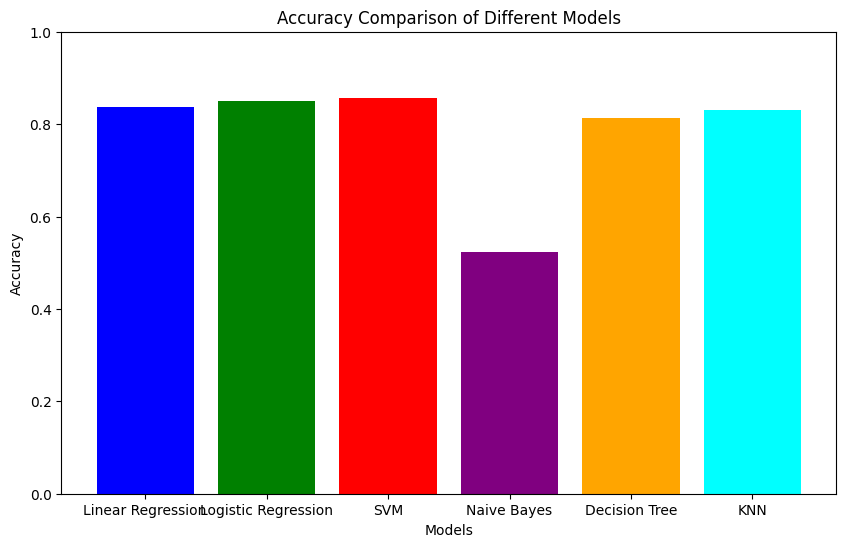

In [49]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize the models
linear_regression = LinearRegression()
logistic_regression = LogisticRegression()
svm_model = SVC()
naive_bayes = GaussianNB()
decision_tree = DecisionTreeClassifier()
knn = KNeighborsClassifier()

# Fit the models to your training data
linear_regression.fit(transformed_x_train, y_train)
logistic_regression.fit(transformed_x_train, y_train)
svm_model.fit(transformed_x_train, y_train)
naive_bayes.fit(transformed_x_train.toarray(), y_train)
decision_tree.fit(transformed_x_train, y_train)
knn.fit(transformed_x_train, y_train)

# Make predictions using the fitted models
y_test_pred_linear = linear_regression.predict(transformed_x_test)
y_test_pred_logistic = logistic_regression.predict(transformed_x_test)
y_test_pred_svm = svm_model.predict(transformed_x_test)
y_test_pred_nb = naive_bayes.predict(transformed_x_test.toarray())
y_test_pred_dt = decision_tree.predict(transformed_x_test)
y_test_pred_knn = knn.predict(transformed_x_test)

# For Linear Regression, convert predictions to binary (0 or 1) based on a threshold (e.g., 0.5)
y_test_pred_linear_binary = (y_test_pred_linear >= 0.5).astype(int)

# Calculate the accuracy for each model
accuracy_linear = accuracy_score(y_test, y_test_pred_linear_binary)
accuracy_logistic = accuracy_score(y_test, y_test_pred_logistic)
accuracy_svm = accuracy_score(y_test, y_test_pred_svm)
accuracy_nb = accuracy_score(y_test, y_test_pred_nb)
accuracy_dt = accuracy_score(y_test, y_test_pred_dt)
accuracy_knn = accuracy_score(y_test, y_test_pred_knn)

# Prepare data for plotting
models = ['Linear Regression', 'Logistic Regression', 'SVM', 'Naive Bayes', 'Decision Tree', 'KNN']
accuracies = [accuracy_linear, accuracy_logistic, accuracy_svm, accuracy_nb, accuracy_dt, accuracy_knn]

# Plot the accuracies
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple', 'orange', 'cyan'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.show()